# Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the Dataset

In [7]:
import pandas as pd

data = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Neflix Project\netflix_movie.csv')
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Cleaning


In [16]:
# Check for missing values
print(data.isnull().sum())
import pandas as pd
data = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Neflix Project\netflix_movie.csv')

#Drop rows with missing director, cast, country
data.dropna(subset=['director', 'cast', 'country'], inplace=True)

# Clean and convert 'date_added'
data['date_added'] = data['date_added'].str.strip()
data['date_added'] = pd.to_datetime(data['date_added'], format='mixed', errors='coerce')

#Verify types
print(data.dtypes)


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          1
duration        3
listed_in       0
description     0
dtype: int64
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


# Exploratory Data Analysis (EDA)
### 1. Content Type Distribution (Movies vs. TV Shows)

<Axes: xlabel='type'>

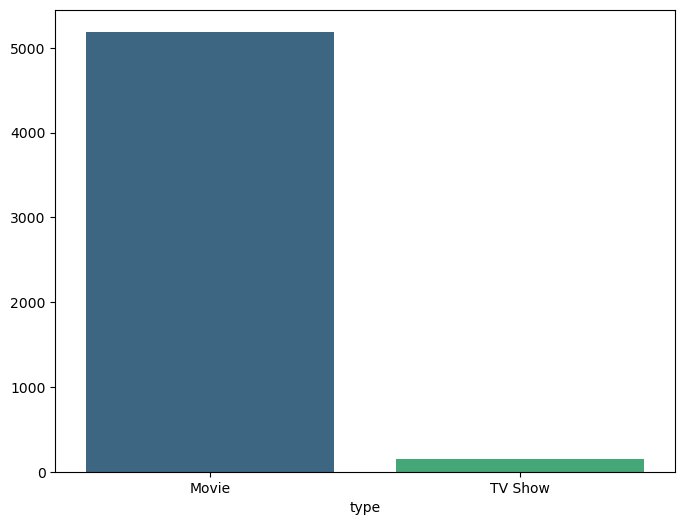

In [65]:
# Count the number of Movies and TV Shows
type_counts = data['type'].value_counts()
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(
    x=type_counts.index,
    y=type_counts.values,
    hue=type_counts.index,
    legend=False,
    palette="viridis"
)

### 2. Most Common Genres

<Axes: ylabel='None'>

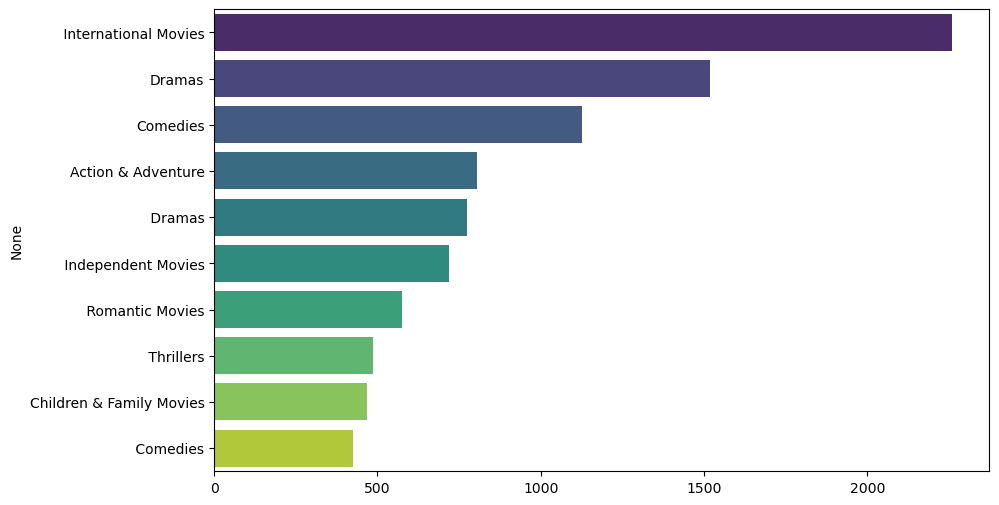

In [32]:
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
    hue=genre_counts.index,
    palette="viridis",
    legend=False
)

### 3.Content Added Over Time

<Axes: xlabel='year_added', ylabel='count'>

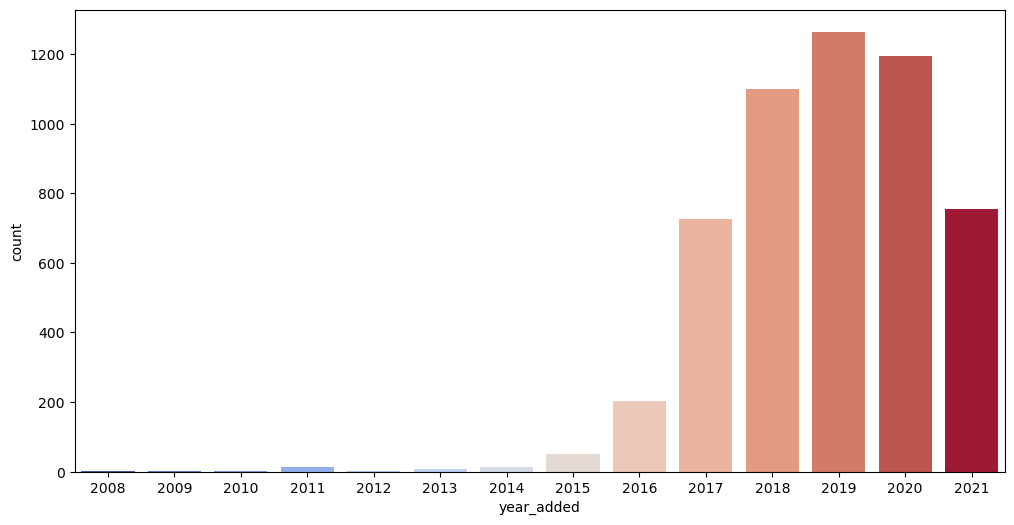

In [37]:
# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(
    x='year_added',
    data=data,
    hue='year_added',
    palette='coolwarm',
    legend=False
)

### 4.Top 10 Directors with the Most Titles

<Axes: ylabel='director'>

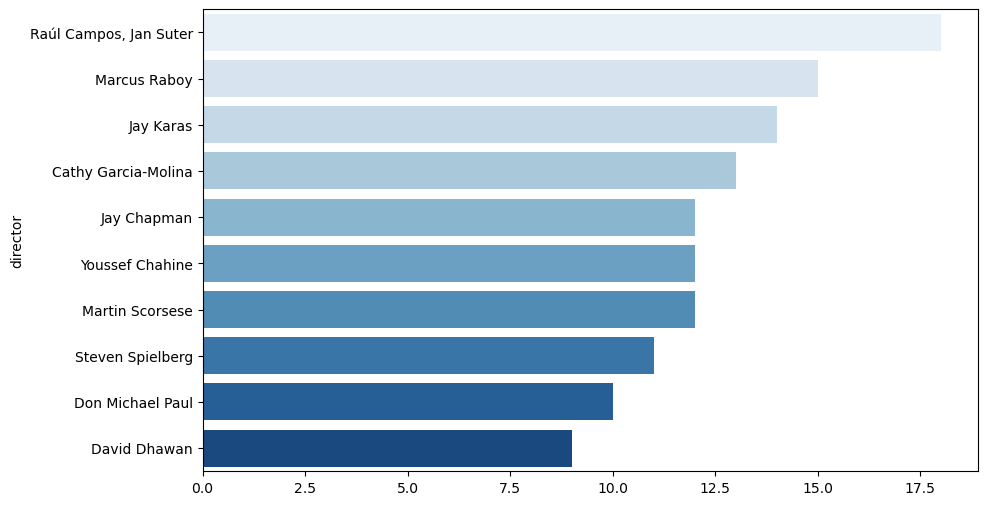

In [61]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)
# Plot top directors
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
    hue=top_directors.index,
    legend=False,
    palette="Blues"
)

### 5.Word Cloud of Movie Titles

In [57]:
!pip install wordcloud



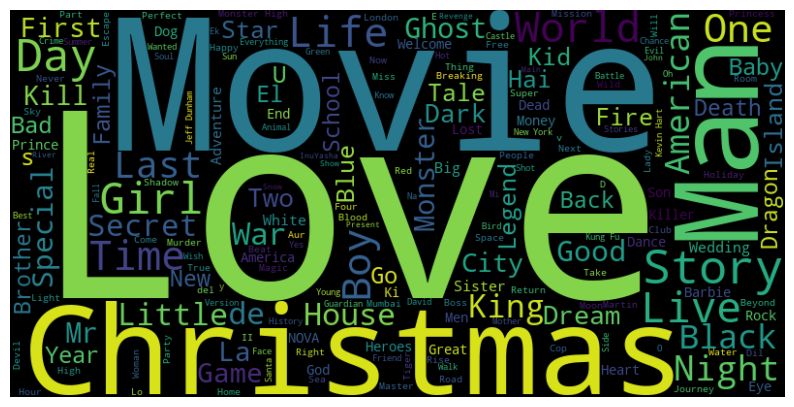

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black'
).generate(' '.join(movie_titles))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
